# Guided Capstone Step 4. Pre-Processing and Training Data Development

**The Data Science Method**  


1.   Problem Identification 


2.   Data Wrangling 
  
 
3.   Exploratory Data Analysis   

4.   **Pre-processing and Training Data Development**  
 * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 3 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**<font color='teal'>  Load the csv file you created in step 3, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [3]:
# Navigate to folder where data is store
!pwd

/Users/jeremysilva/desktop/Springboard/Guided_Capstone


In [4]:
cd data

/Users/jeremysilva/Desktop/Springboard/Guided_Capstone/data


In [5]:
# Load the step3 output into a dataframe called ski_data
ski_data= pd.read_csv('step3_output.csv', index_col=[0])
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 27 columns):
Name                 330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null float64
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       330 non-null float64
daysOpenLastYear     330 non-null float64
yearsOpen            330 non-null float64
averageSnowfall      330 non-null flo

In [6]:
ski_data.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,K-Means Clusters
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `state`. Add the dummies back to the dataframe and remove the original column for `state`. </font>**

Hint: you can see an example of how to execute this in Aiden's article on preprocessing [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967). 

In [7]:
# select object type columns but drop the name column 
ski_data_obj=ski_data.select_dtypes(include=['object']).drop(columns=['Name'])
# Concat the two dataframes and get dummies for the categorical variables
ski_data_dum = pd.concat([ski_data.drop(ski_data_obj, axis=1), pd.get_dummies(ski_data_obj)], axis=1)
ski_data_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 61 columns):
Name                    330 non-null object
summit_elev             330 non-null int64
vertical_drop           330 non-null int64
base_elev               330 non-null int64
trams                   330 non-null int64
fastEight               330 non-null float64
fastSixes               330 non-null int64
fastQuads               330 non-null int64
quad                    330 non-null int64
triple                  330 non-null int64
double                  330 non-null int64
surface                 330 non-null int64
total_chairs            330 non-null int64
Runs                    330 non-null float64
TerrainParks            330 non-null float64
LongestRun_mi           330 non-null float64
SkiableTerrain_ac       330 non-null float64
Snow Making_ac          330 non-null float64
daysOpenLastYear        330 non-null float64
yearsOpen               330 non-null float64
averageSnowfall   

## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing standardize the scale of the features of the dataframe except the name of the resort which we done't need in the dataframe for modeling, so it can be droppped here as well. Also, we want to hold out our response variable(s) so we can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as our response for scaling and modeling. Later we will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave them in the development dataframe. </font>**

In [8]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = ski_data_dum.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y= ski_data_dum['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X)


## Split into training and testing datasets

**<font color='teal'> Using sklearn model selection import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. We will start by using the adult weekend ticket price as our response variable for modeling.</font>**

In [9]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

Here we start the actual modeling work. First let's fit a multiple linear regression model to predict the `AdultWeekend` price.

# Guided Capstone Step 5. Modeling


This is the fifth step in the Data Science Method. In the previous steps you cleaned and prepared the datasets. Now it's time to get into the most exciting part: modeling! In this exercise, you'll build three different models and compare each model's performance. In the end, you'll choose the best model for demonstrating insights to Big Mountain management.



### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with a Training Dataset

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

#### Model 1

In [10]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

Hint: you will have to use the `predict()` method here as it's used in this [DSM article](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b) about modeling. 

In [11]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred= model.predict(X_test)

## Review Model Outcomes — Iterate over additional models as needed

In [12]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
from sklearn.metrics import explained_variance_score, mean_absolute_error
# You can plug y_test and y_pred into the functions to evaluate the model
evs= explained_variance_score(y_test, y_pred)
evs

0.9340692902107184

In [13]:
mae= mean_absolute_error(y_test, y_pred)
mae

5.0870391419116

**<font color='teal'> Print the intercept value from the linear model. </font>**

Hint: our linear regression model `lm` has an attribute `intercept_` for the intercept

In [14]:
lm.intercept_


64.10898999760681

**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for the resulting `AdultWeekend` value. Also, because we took the time to scale our x values in the training data, we can compare each of the coeeficients for the features to determine the feature importances. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** 


Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what we are looking for is the magnitude of impact on our response variable.

In [15]:
### Is it right that state dummies make up the bulk of the top 10 response variables?
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
coeff= pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
# Convert the coeffiecients to absolute values
coeff= coeff.abs()
# Sort the values by Cofficient in dewcending order to view the response variables with largest impact 
coeff= coeff.sort_values(by='Coefficient', ascending=False)
coeff.head(10)


,Coefficient
state_New York,1.031218e+13
state_Michigan,9.731897e+12
state_Colorado,8.574365e+12
state_California,8.390815e+12
state_Pennsylvania,8.007045e+12
state_New Hampshire,7.383122e+12
state_Wisconsin,7.383122e+12
state_Vermont,7.160052e+12
state_Minnesota,6.928238e+12
state_Utah,6.686773e+12


(array([ 4.,  8., 17., 18., 20.,  8.,  2.,  4.,  0.,  2.]),
 array([-12.84727125,  -9.34082594,  -5.83438062,  -2.32793531,
          1.17851   ,   4.68495531,   8.19140063,  11.69784594,
         15.20429125,  18.71073656,  22.21718188]),
 <a list of 10 Patch objects>)

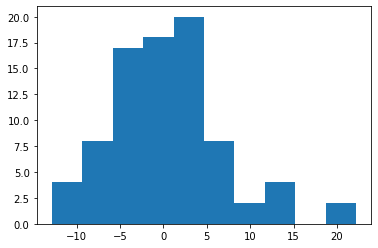

In [16]:
# Plot the residuals 
plt.hist(x= y_test - y_pred)

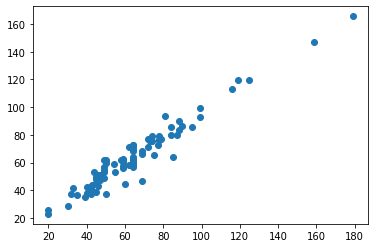

In [17]:
# Look at predicted vs actual
plt.scatter(x=y_test, y=y_pred)

**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that we care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

Hint: Try to construct another model using exactly the steps we followed above. 

#### Model 2

In [18]:
# Remove all the state dummy variables and save that to a special df for this model
ski_data_model2= ski_data_dum.iloc[:, :26]
# Check out the model2 df
ski_data_model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 26 columns):
Name                 330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
base_elev            330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null float64
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       330 non-null float64
daysOpenLastYear     330 non-null float64
yearsOpen            330 non-null float64
averageSnowfall      330 non-null float64
AdultWeekday         330 non-null fl

In [19]:
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X2 = ski_data_model2.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y2= ski_data_model2['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler2 = preprocessing.StandardScaler().fit(X2)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X2_scaled=scaler2.transform(X2)

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y2 = y2.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.25, random_state=1)

lm = linear_model.LinearRegression()
model2 = lm.fit(X2_train,y2_train)

# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y2_pred= model2.predict(X2_test)

In [20]:
# You can plug y_test and y_pred into the functions to evaluate the model
# It looks like EVS decreased a biy after removing the state variables
evs2= explained_variance_score(y2_test, y2_pred)
evs2

0.9254883540020524

In [21]:
# It looks like MAE went up slightly when state variables were removed
mae2= mean_absolute_error(y2_test, y2_pred)
mae2

5.4667486595639305

In [22]:
# This is the average AdultWeekend price when accounting for all variables 
lm.intercept_

64.07302848343141

In [23]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
coeff= pd.DataFrame(abs(lm.coef_), X2.columns, columns=['Coefficient'])
# Convert the coeffiecients to absolute values
coeff= coeff.abs()
# Sort the values by Cofficient in dewcending order to view the response variables with largest impact 
coeff= coeff.sort_values(by='Coefficient', ascending=False)
coeff.head(10)

,Coefficient
AdultWeekday,19.964116
summit_elev,12.995770
base_elev,11.033267
vertical_drop,4.885357
Runs,1.602766
quad,1.567707
averageSnowfall,1.507393
triple,1.434225
K-Means Clusters,1.392053
surface,1.351939


(array([ 2.,  4., 16., 20., 15., 13.,  6.,  4.,  0.,  3.]),
 array([-15.62774695, -11.86511657,  -8.10248619,  -4.33985581,
         -0.57722543,   3.18540495,   6.94803534,  10.71066572,
         14.4732961 ,  18.23592648,  21.99855686]),
 <a list of 10 Patch objects>)

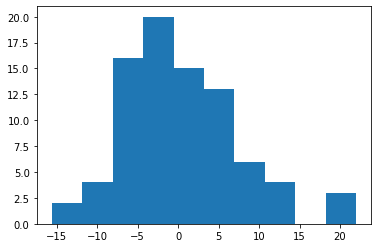

In [24]:
# Plot the residuals 
plt.hist(x= y2_test - y2_pred)

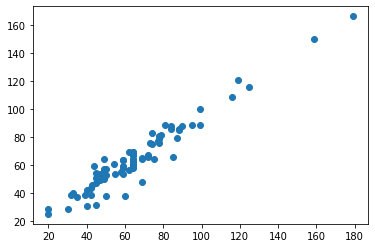

In [25]:
# Look at predicted vs actual
plt.scatter(x=y2_test, y=y2_pred)

**<font color='teal'> When reviewing our new model coefficients, we see `summit_elev` is now in the number two spot. This is also difficult to change from a management prespective and highly correlated with `base_elev` and `vertical_drop`.  This time, rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

In [26]:
# Creating a new model without summit_elev and base_elev 
ski_data_model3= ski_data_model2.drop(columns=['summit_elev', 'base_elev'])
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X3 = ski_data_model3.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y3= ski_data_model3['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler3 = preprocessing.StandardScaler().fit(X3)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X3_scaled=scaler3.transform(X3)

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y3 = y3.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.25, random_state=1)

lm = linear_model.LinearRegression()
model3 = lm.fit(X3_train,y3_train)

# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y3_pred= model3.predict(X3_test)

In [27]:
# You can plug y_test and y_pred into the functions to evaluate the model
evs3= explained_variance_score(y3_test, y3_pred)
evs3

0.9310919745297067

In [28]:
# It looks like MAE went up slightly when state variables were removed
mae3= mean_absolute_error(y3_test, y3_pred)
mae3

5.266469109834687

In [29]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
coeff= pd.DataFrame(abs(lm.coef_), X3.columns, columns=['Coefficient'])
# Convert the coeffiecients to absolute values
coeff= coeff.abs()
# Sort the values by Cofficient in dewcending order to view the response variables with largest impact 
coeff= coeff.sort_values(by='Coefficient', ascending=False)
coeff.head(10)

,Coefficient
AdultWeekday,19.944961
vertical_drop,1.765980
Runs,1.688866
quad,1.519045
averageSnowfall,1.452734
triple,1.415659
K-Means Clusters,1.325113
surface,1.291793
daysOpenLastYear,0.996819
fastQuads,0.796040


(array([ 2.,  4., 15., 20., 18., 11.,  7.,  3.,  1.,  2.]),
 array([-15.5067564 , -11.76637769,  -8.02599899,  -4.28562029,
         -0.54524159,   3.19513712,   6.93551582,  10.67589452,
         14.41627322,  18.15665193,  21.89703063]),
 <a list of 10 Patch objects>)

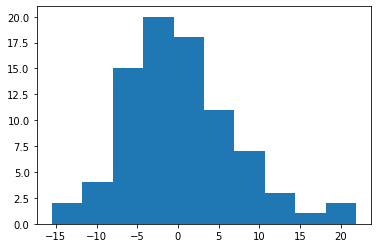

In [30]:
# Plot the residuals 
plt.hist(x= y3_test - y3_pred)

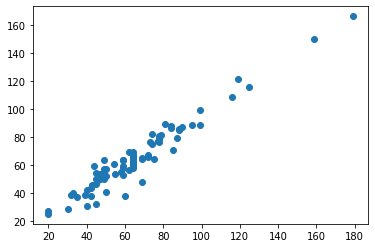

In [31]:
# Look at predicted vs actual
plt.scatter(x=y3_test, y=y3_pred)

## Identify the Final Model

**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell — you will discuss this selection more in the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | evs |  |-|
| Model 2. | evs2| |'state'|
| Model 3. | evs3 | |'state','summit_elev','base_elev'|

In [33]:
data= [['Model 1', evs, mae, 'none'], ['Model 2', evs2, mae2, 'state'], ['Model 3', evs3, mae3, 'state, summit_elev, base_elev']]
models_df= pd.DataFrame(data, columns=['Model', 'Explained Variance', 'Mean Absolute Error', 'Features Dropped'])
models_df.to_csv('~/Desktop/Springboard/Guided_Capstone/models/model_performance.csv')
models_df

,Model,Explained Variance,Mean Absolute Error,Features Dropped
0,Model 1,0.934069,5.087039,none
1,Model 2,0.925488,5.466749,state
2,Model 3,0.931092,5.266469,"state, summit_elev, base_elev"


Model Selection: Model 3 it has the 2nd best EVS and MAE but it has the most relevant columns in it